In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Usar pandas para leer el archivo __.csv__

In [2]:
productividad = pd.read_csv('productivity.csv')
productividad.head(5) 

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


Los datos tienen las siguientes columnas:
* date: fecha en hora
* day: dia de la semana
* quarter: una parte del mes. Un mes se dividió en 4
* department: departamento asociado con la instancia
* team_no_workers: Número de trabajadores en cada equipo
* no_of_style_change: Número de cambios en el estilo de un producto en particular
* Target productividad establecida por la autoridad para cada equipo para cada dia
* smv: trabajo en curso. Incluye el número de elementos sin terminar de los productos
* wip: trabajoen curso. Incluye el número de elementos in terminar de los productos
* over_time: representa la cantidad de horas extra de cada equipo en minutos
* incentive: Representa la cantidad de incentivo financiero (en BDT) que habilita o motiva un curso de acción en particular
* idle_time: La cantidad de tiempo durante el cual se interrumpio la produccion debido a varias razones
* idle_men: el número de trabajdores que estuvieron inactivos debido a la interrupcion de la produccion.
* actual_productivity: El % rela de productividad que entregaron los trabajadores. Va de 0 a 1

# Limpieza de los datos

Se buscara algun erros de tipeo, valores nulos, etc.

In [3]:
productividad.shape

(1197, 15)

Veremos si algun dato supera el 100% de la productividad

In [4]:
productividad[productividad['actual_productivity']>1].shape

(37, 15)

Se Elimina esos puntos, por que no puede ver valores superiores a 100%

In [5]:
productividad = productividad.drop(productividad[productividad['actual_productivity']>1].index)
productividad.shape

(1160, 15)

Ahora veremos si existe algun error de tipeado en los datos de la columna __'department'__

In [6]:
productividad['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

Se observa que en la variable __'department'__ hay un error de tipiado en los datos finishing; como no saber en cual de los demas datos puede a ver un error del mismo tipo se usa mejor una funcion para que cheque en todos los datos de las columnas 

In [7]:
def whitespace_remover(dataframe):
    # iterando sobre las columnas
    for i in dataframe.columns:
          
        # comprobar el tipo de datos de cada columna
        if dataframe[i].dtype == 'object':
              
            # aplicando la función strip en la columna
            dataframe[i] = dataframe[i].map(str.strip)
        else:
              
            # si condn. es falso, entonces no hará nada.
            pass
#la funcion whitespca_remover en el marco de datos 
whitespace_remover(productividad)
  
# printing dataframe
productividad.department.unique()


array(['sweing', 'finishing'], dtype=object)

Hay que ver si en nuestra base de datos hay algun valor nulo por lo cual se usara la funcion __.isnull()__ pero para saber donde hay se le agrega la funcion __.any()__

In [8]:
productividad.isnull().any()

date                     False
quarter                  False
department               False
day                      False
team                     False
targeted_productivity    False
smv                      False
wip                       True
over_time                False
incentive                False
idle_time                False
idle_men                 False
no_of_style_change       False
no_of_workers            False
actual_productivity      False
dtype: bool

Se eliminara los valores nulos de la variable wip

In [9]:
productividad['wip'] = productividad['wip'].fillna(0)

Para saber si todo esta correcto se vera si existe algun dato nullo aun en la variable __wip__

In [10]:
productividad.wip.isnull().sum()

0

En la columna __quarter__ se nos indica que a sido divido en 4

In [11]:
productividad.quarter.value_counts()

Quarter1    348
Quarter2    324
Quarter4    243
Quarter3    204
Quarter5     41
Name: quarter, dtype: int64

Vemos un 5 quarter, debio hacer sido un error de tipeado a la hora de pasar la base de datos.

Se eliminara esos datos



In [12]:
productividad = productividad.drop(productividad[productividad['quarter'] == 'Quarter5'].index)

In [13]:
productividad.quarter.value_counts()

Quarter1    348
Quarter2    324
Quarter4    243
Quarter3    204
Name: quarter, dtype: int64

# EDA

Se vera como el trabajo esta distribuido en los departamentos de la empresa

In [14]:
productividad.department.value_counts()

sweing       646
finishing    473
Name: department, dtype: int64

Si queremos verlo tambien en porcentaje:

In [15]:
productividad.department.value_counts(normalize=True)

sweing       0.577301
finishing    0.422699
Name: department, dtype: float64

Se puede observar que la mayor carga de trabajo ocurre en el departamento de sweing(cocido) del cual ocurre un 57.73%

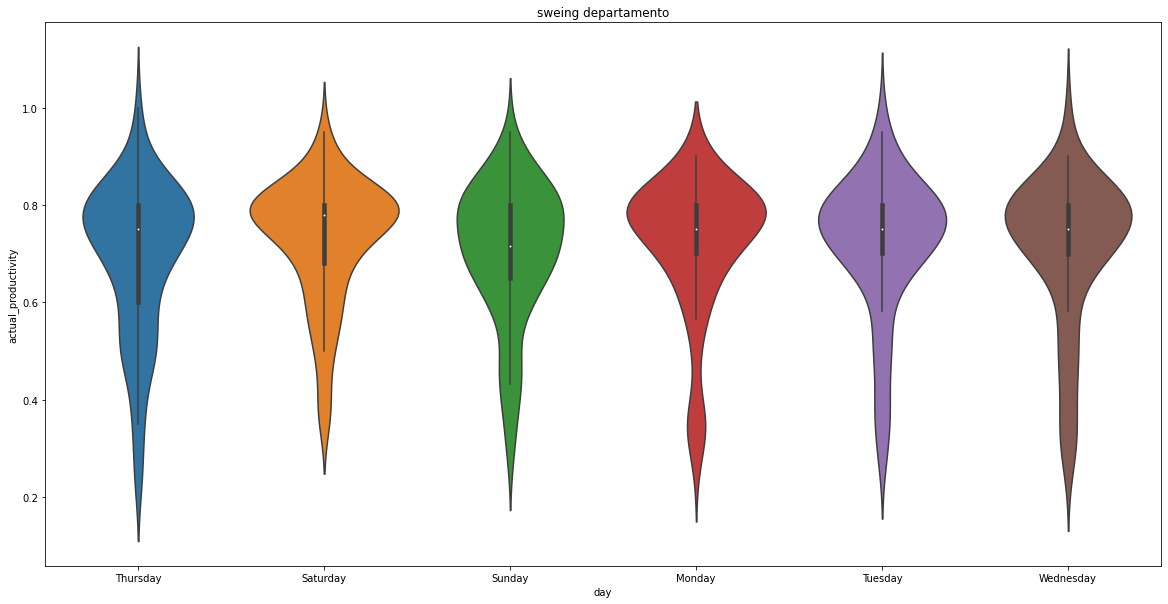

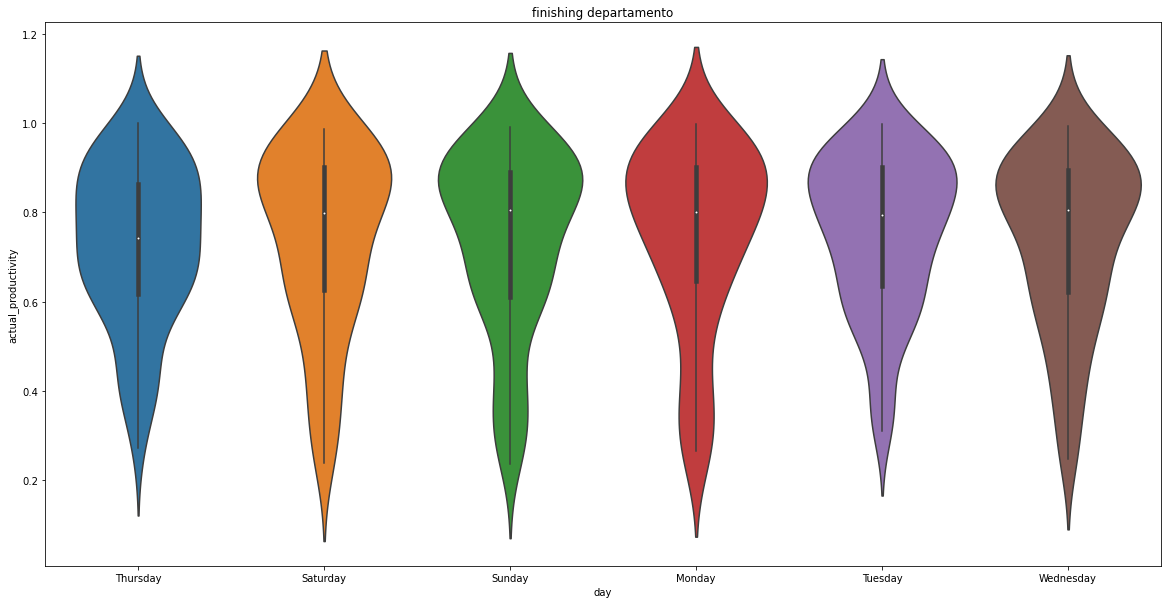

In [16]:
for department in productividad['department'].unique():
    plt.figure(figsize = (20,10))
    sns.violinplot(x = 'day', y = 'actual_productivity',data=productividad[productividad['department'] == department]).set_title('{} departamento'.format(department))
    plt.show()

Se puede ver que % de productividad entre ambos departamentos estan en su mayoria alrededor del 70% los dias laborales.
Se visualiza que el departamento de acabado(finishing) tiene mayor % productividad en todos los dias a comparacion del otro departamento

In [17]:
productividad.groupby(
    ['quarter','department']
).agg(
    mean_produccion = pd.NamedAgg(column='actual_productivity', aggfunc='mean'),
    median_produccion = pd.NamedAgg(column='actual_productivity',aggfunc='median')
)

mean_produccion  median_produccion
quarter  department                                    
Quarter1 finishing          0.753084           0.805195
         sweing             0.735124           0.770492
Quarter2 finishing          0.755046           0.817263
         sweing             0.717649           0.770401
Quarter3 finishing          0.722271           0.730790
         sweing             0.677773           0.700609
Quarter4 finishing          0.710164           0.769293
         sweing             0.697063           0.750170

Como se pudo intuir con la grafica de violin, la produccion media en todos los departamentos pero divididos en trimestres y dividos en los departamentos nos da un produccion media minima del 70%, con una mediana igual al 70%

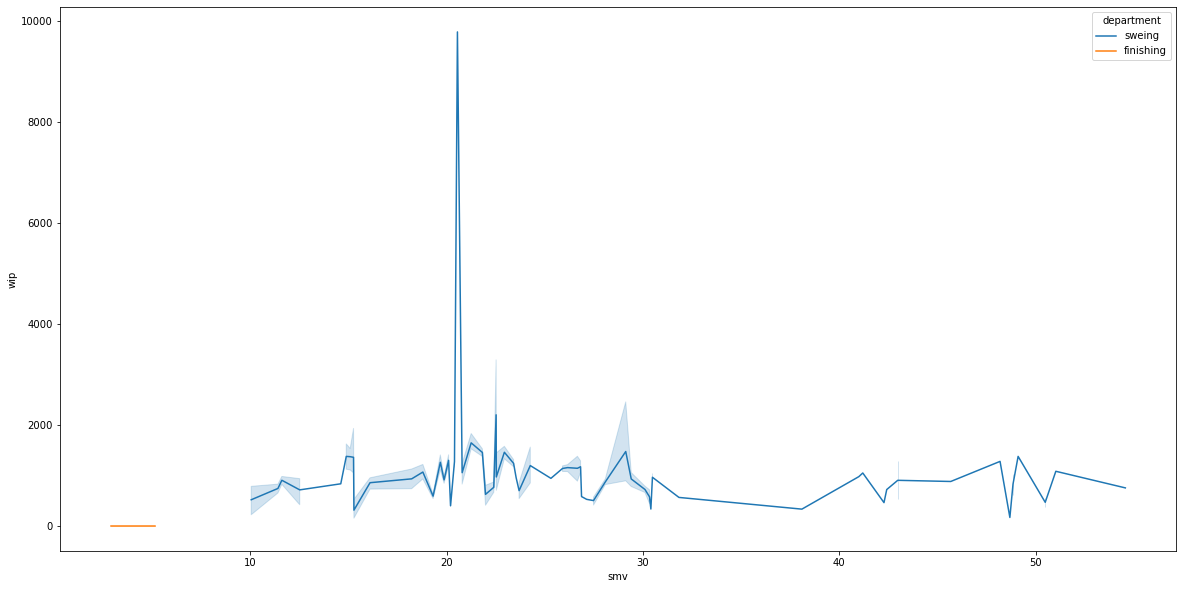

In [18]:
plt.figure(figsize = (20,10))
sns.lineplot(data=productividad,x = 'smv', y = 'wip', hue='department')
plt.show()

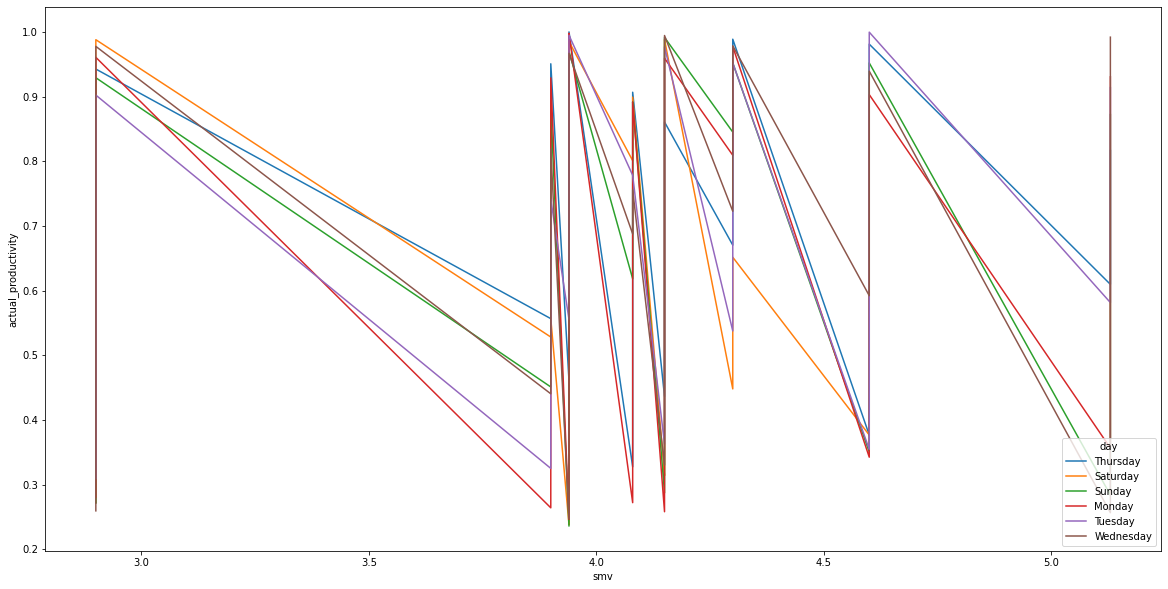

In [19]:
plt.figure(figsize = (20,10))
sns.lineplot(data=productividad[productividad['department']=='finishing'],x = 'smv', y = 'actual_productivity',hue = 'day',estimator=None)
plt.show()

Se ve que en el departamento sweing(coser) lo cual indica que donde mas tiempo se pasa los trabajadores, por lo cual se debe dar un analisis a el departamento para tener mas conocimiento de lo que ocurre en tal departamento

<AxesSubplot:xlabel='department', ylabel='no_of_workers'>

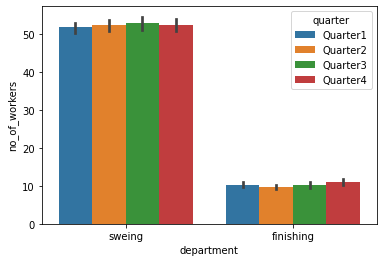

In [20]:
sns.barplot(x='department', y='no_of_workers',hue='quarter',
 data=productividad)

Como ya se sabia en sweing hay mucho mas trabajo con respecto a finishing(acabado), Se puede ver que en finishing hay mas trabajadores en el Quarter4

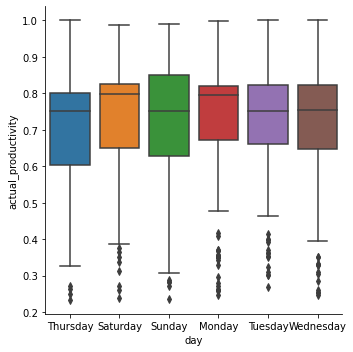

In [21]:
sns.catplot(x="day", y="actual_productivity", kind="box", data=productividad)

C:\Users\Brandon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='actual_productivity', ylabel='Density'>

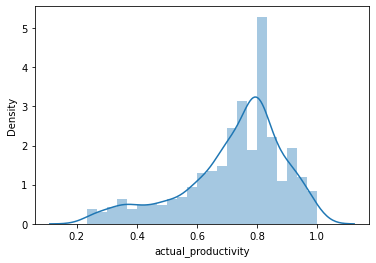

In [22]:
sns.distplot(productividad['actual_productivity'])


Se ve que % de productividad tienen mayor concentracion entre el 0.6 y 1; pero tambien se observa que hay una produccion mayor al 20%, y tiende siempre a subir el % produccion

In [23]:
productividad.groupby(['day']).agg(
    media_produccion = pd.NamedAgg(column='actual_productivity', aggfunc='mean'),
    mediana_producion =pd.NamedAgg(column='actual_productivity', aggfunc='median'))


,media_produccion,mediana_producion
day,,
Monday,0.729455,0.794567
Saturday,0.731505,0.796854
Sunday,0.717680,0.750462
Thursday,0.705602,0.750185
Tuesday,0.733208,0.750650
Wednesday,0.719158,0.755361


Se puede ver que el % de la produccion es alta con un minimo de 70.056% los __thursday__; teniendo una mayor condensacion de  produccion el dia __Monday__ con 79.46%

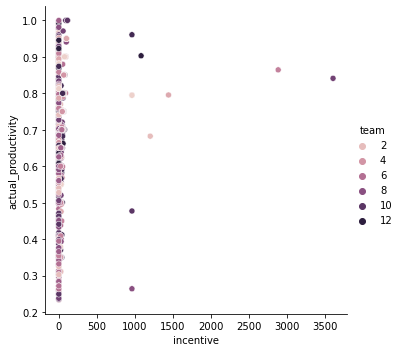

In [24]:
sns.relplot(x="incentive", y="actual_productivity", hue="team", data=productividad)

Hay incentivos muy altos que no dejan apreciar bien los datos por lo cual se procedera a eliminar esos puntos para tener mas vision de la relacion del incentivo y la productividad

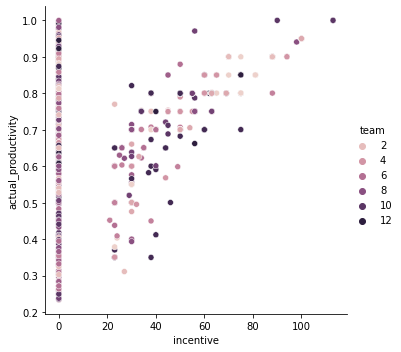

In [25]:
produc_1 = productividad[productividad['incentive']<200]
sns.relplot(x="incentive", y="actual_productivity", hue="team", data=produc_1);

In [26]:
produc_1['incentive'].quantile(0.50)

0.0

Se ve que la mayoria de los incentivos dados es absolutamente naada, pero se ve que hay una cierta cantidad de incentivos que se puede analizar que estarian entre los 20  y los 100

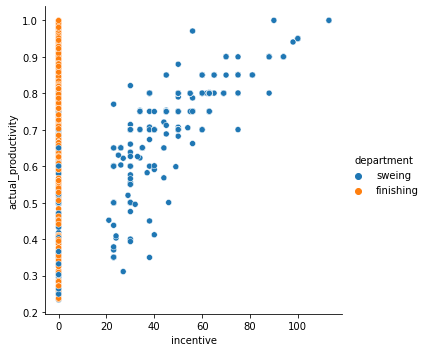

In [27]:
sns.relplot(x="incentive", y="actual_productivity", hue="department", data=produc_1);

La mayoria de los incentivos se van para el departamento de __Sweing__ se puede inferir es por la importancia que tiene en la empresa la parte del cosido. Mientras que en el departamento de __Fishining__ es un trabajo inclusivo mas sencillo en comparacion con el otro departamento

In [28]:
prod = productividad[(productividad['incentive'] > 19 ) & (productividad['incentive'] < 100 )]
prod

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


In [29]:
prod.quarter.value_counts()

Quarter1    164
Quarter2    149
Quarter4    120
Quarter3    101
Name: quarter, dtype: int64

En el Quarter1 es donde mayor incentivos hay, y en la Quarter3 hay menos con un 101 pero dentro de los quarter estan bien equilibradas

In [30]:
prod.groupby(
    ['team']
).agg(
    mean_incentive = pd.NamedAgg(column='incentive', aggfunc='mean'),
    mean_produccion = pd.NamedAgg(column='actual_productivity',aggfunc='mean')
)

,mean_incentive,mean_produccion
team,,
1,62.285714,0.785614
2,50.757576,0.758873
3,51.333333,0.753061
4,51.918367,0.745318
5,40.868421,0.669382
6,44.425532,0.754472
7,42.600000,0.740502
8,43.800000,0.732201
9,50.057692,0.761423


In [31]:
print((prod.incentive.mean()), prod.incentive.median())

48.853932584269664 50.0


El incentivo medio qu se les da a todos los del departamento __sweing__ es de 48.85 

Se logro arreglar el error te tipieado.

Ahora hallaremos la matriz de correlacion de los datos para conocer la relacion tiene las variables

<AxesSubplot:>

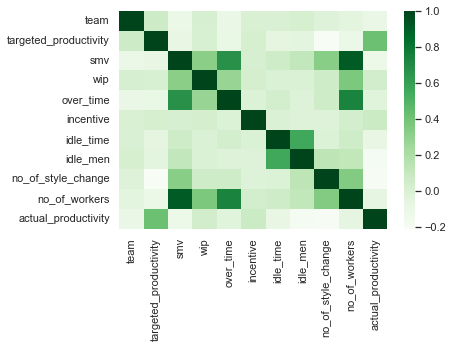

In [32]:
sns.set_theme(style='white')
sns.heatmap(productividad.corr(),cmap='Greens')

Se puede ver que hay correlaciones en general bajos pero hay alguno que tienen una fuerte correlacion:
+ smv con no_of_worker con un valor mayor a 0.8 dando una relacion fuerte directa
+ over_time con no_of_worker con un valor a 0.6 dando una relacion fuerte directa

Y se puede ver que la mayoria no tiene alguna correlacion lo cual indica que no tiene una tendencia a seguir las variables entre ellas

# Transformacion de los datos

Crearemos de las columnas año y mes del la columna __date__

In [33]:
#Se separan los datos de las fechas en diferentes dolumnas
productividad['date'] = pd.to_datetime(productividad['date'])
productividad['year'] = productividad['date'].dt.year
productividad['day'] = productividad['date'].dt.day
productividad['month'] = productividad['date'].dt.month
#Elimina la columna fecha de los datos
productividad.drop('date', axis = 1, inplace=True)


In [34]:
productividad.head(10)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,year,month
0,Quarter1,sweing,1,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,2015,1
1,Quarter1,finishing,1,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,2015,1
2,Quarter1,sweing,1,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2015,1
3,Quarter1,sweing,1,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2015,1
4,Quarter1,sweing,1,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,2015,1
5,Quarter1,sweing,1,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125,2015,1
6,Quarter1,finishing,1,2,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.755167,2015,1
7,Quarter1,sweing,1,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683,2015,1
8,Quarter1,sweing,1,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098,2015,1
9,Quarter1,sweing,1,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428,2015,1


Pasar las ultimas columnas al principio de las columnas

In [35]:
cols = productividad.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]
cols

['year',
 'month',
 'quarter',
 'department',
 'day',
 'team',
 'targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'actual_productivity']

In [36]:
productividad = productividad[cols]
productividad.head()

,year,month,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015,1,Quarter1,sweing,1,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015,1,Quarter1,finishing,1,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,2015,1,Quarter1,sweing,1,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015,1,Quarter1,sweing,1,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015,1,Quarter1,sweing,1,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [37]:
from sklearn.preprocessing import LabelEncoder

catogrical = [x for x in productividad.columns if productividad[x].dtype == "object"]
label_encoder = LabelEncoder()
for col in catogrical:
    productividad[col] = label_encoder.fit_transform(productividad[col])
    
productividad.head(10)

,year,month,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015,1,0,1,1,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015,1,0,0,1,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,2015,1,0,1,1,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015,1,0,1,1,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015,1,0,1,1,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,2015,1,0,1,1,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,2015,1,0,0,1,2,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.755167
7,2015,1,0,1,1,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,2015,1,0,1,1,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,2015,1,0,1,1,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


# Regresión Lineal

Usaremos la libreria __sklearn__

---

In [38]:
x = productividad.drop('actual_productivity',axis=1)
y = productividad['actual_productivity']

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.3 , random_state=0
)

In [40]:
x_train.isna().any().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of year                     False
month                    False
quarter                  False
department               False
day                      False
team                     False
targeted_productivity    False
smv                      False
wip                      False
over_time                False
incentive                False
idle_time                False
idle_men                 False
no_of_style_change       False
no_of_workers            False
dtype: bool>

In [41]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(x_train, y_train)

In [42]:
# La intercepcion de la ecucacion es:
lm.intercept_

0.3791770006628764

In [43]:
print('Los coeficientes son:')
[(col,coef) for col , coef in 
    zip(x_train.columns, lm.coef_)]

Los coeficientes son:


[('year', 0.0),
 ('month', -0.02375633677166227),
 ('quarter', -0.012032892886711917),
 ('department', -0.046444607481833856),
 ('day', 0.0002336382727662914),
 ('team', -0.005554546495896522),
 ('targeted_productivity', 0.6056192967717567),
 ('smv', -0.006870760577587492),
 ('wip', 3.4048672641548305e-06),
 ('over_time', -4.2168984857274485e-06),
 ('incentive', 7.729805898163352e-05),
 ('idle_time', 0.00010404993753599512),
 ('idle_men', -0.009895875591229978),
 ('no_of_style_change', -0.026993828901633737),
 ('no_of_workers', 0.004318939649750113)]

In [44]:
preds = lm.predict(x_test)

Text(0.5, 1.0, 'Resultados de regresion lineal')

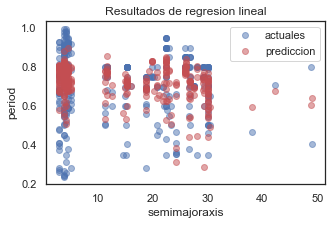

In [45]:
fig, axes = plt.subplots(1, 1, figsize=(5, 3))
>>> axes.plot(
    x_test.smv, y_test, 'ob',
    label='actuales', alpha=0.5
)
axes.plot(
    x_test.smv, preds, 'or',
    label='prediccion', alpha=0.5
)
axes.set(xlabel='semimajoraxis', ylabel='period')
axes.legend()
axes.set_title('Resultados de regresion lineal')

Revisamos su correlacion para ver que tal bien nuestro modelo predice la verdadera relacion:

In [46]:
np.corrcoef(y_test,preds) [0] [1]

0.4752607077225587

tiene una correlacion baja para tener una relacion mas precisa mejor es verlo en las metricas

In [47]:
lm.score(x_test,y_test)

0.22117188471400728

La R^2 es muy baja 0.2802 por lo cual nuestro modelo de regresion no es confiable

In [48]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test,preds)

0.08194089400734983

Usando la libreria __statsmodels__

---

In [49]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

In [50]:
X_train = sm.add_constant(x_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.279
Model:                             OLS   Adj. R-squared:                  0.266
Method:                  Least Squares   F-statistic:                     21.23
Date:                 Tue, 07 Sep 2021   Prob (F-statistic):           6.35e-46
Time:                         11:25:14   Log-Likelihood:                 422.46
No. Observations:                  783   AIC:                            -814.9
Df Residuals:                      768   BIC:                            -745.0
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
year                

C:\Users\Brandon\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Se ve que el modelo es significativo; pero hay variables dentro del modelo de regresion no es significativo como las variables:
+ month
+ quarter
+ departament
+ wip
+ over_time
+ incentive
+ idle_men
+ no_of_style_change

## Intervalo de confianza de los coeficientes

In [51]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
year,0.000138,2.388235e-04
month,-0.039862,-7.650662e-03
quarter,-0.050194,2.612811e-02
department,-0.107753,1.486383e-02
day,-0.005186,5.653335e-03
team,-0.008674,-2.434724e-03
targeted_productivity,0.497078,7.141609e-01
smv,-0.009086,-4.655106e-03
wip,-0.000003,9.672820e-06
over_time,-0.000009,5.742381e-07


## Diagnostico de Residuos

In [52]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================

prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

## Inspeccion Visual

C:\Users\Brandon\AppData\Local\Temp/ipykernel_12488/2836926937.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
C:\Users\Brandon\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\Brandon\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


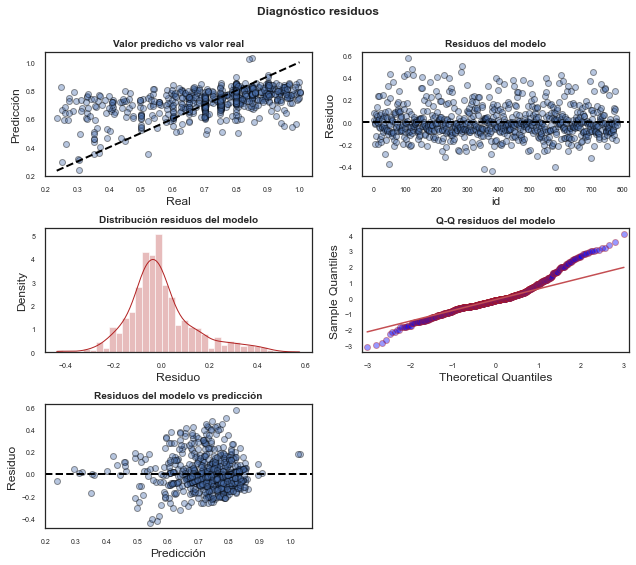

In [53]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

## Prueba de normalidad

In [54]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 105.87788839170341, p-value = 1.0207247794101017e-23


La prueba de normalidad nos da un valor menor a 0.05; lo cual se rechaza la hipotesis que los residuos sigan una distribucion normal

## Predicciones

In [55]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.get_prediction(exog = x_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
37,0.716673,0.014846,0.687529,0.745816,0.435531,0.997815
143,0.797013,0.014688,0.768179,0.825847,0.515903,1.078123
158,0.782217,0.012548,0.757584,0.806850,0.501507,1.062927
40,0.793366,0.013849,0.766178,0.820553,0.512420,1.074311


## Error de test

In [56]:
from sklearn.metrics import mean_squared_error
# Error de test del modelo 
# ==============================================================================
x_test = sm.add_constant(x_test, prepend=True)
predicciones = modelo.predict(exog = x_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 0.15129362252688605


C:\Users\Brandon\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c0a99772-3ae2-44e5-9f22-e270f72fea84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>